# V Wind Component GRIB2 File - Exploratory Data Analysis

This notebook is designed to explore and understand the structure of GRIB2 files containing V wind component data (northward wind) from ICON-D2 model for Germany.

**Goal**: Unfold and understand every aspect of the GRIB2 file in a structured way, similar to how we would explore a pandas DataFrame.

**File to analyze**: `../data/v/icon-d2_germany_regular-lat-lon_model-level_2025110900_003_15_v.grib2.bz2`

We'll proceed step-by-step to:
1. Load the file
2. Inspect how many parameters are present
3. Understand each parameter in detail
4. Explore relationships between parameters
5. Visualize the data structure and content

## 1. Import Required Libraries

Let's start by importing the necessary libraries:
- **xarray**: For working with multi-dimensional labeled arrays (think of it as pandas for N-dimensional data)
- **cfgrib**: Backend engine for xarray to read GRIB files
- **pandas**: For familiar tabular data operations when we convert data
- **numpy**: For numerical operations
- **matplotlib**: For visualization

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the GRIB2 File

We'll load the GRIB2 file using xarray with the cfgrib engine. This will give us a Dataset object, which is similar to having multiple related DataFrames with shared indices.

In [2]:
import bz2

# Load the GRIB2 file
file_path = '../data/v/icon-d2_germany_regular-lat-lon_model-level_2025110900_003_15_v.grib2.bz2'
decompressed_path = '../data/v/icon-d2_germany_regular-lat-lon_model-level_2025110900_003_15_v.grib2'  # Temporary decompressed file

# Decompress the file
with bz2.open(file_path, 'rb') as f_in, open(decompressed_path, 'wb') as f_out:
    f_out.write(f_in.read())

# Open the decompressed file using xarray
ds = xr.open_dataset(decompressed_path, engine='cfgrib')

print(f"File loaded successfully!")
print(f"Dataset type: {type(ds)}")

File loaded successfully!
Dataset type: <class 'xarray.core.dataset.Dataset'>


## 3. First Look at the Dataset

Let's take our first look at what's inside the dataset. Think of this as similar to running `df.info()` or `df.head()` in pandas.

In [3]:
ds

<xarray.Dataset> Size: 4MB
Dimensions:               (latitude: 746, longitude: 1215)
Coordinates:
  * latitude              (latitude) float64 6kB 43.18 43.2 ... 58.06 58.08
  * longitude             (longitude) float64 10kB -3.94 -3.92 ... 20.32 20.34
    time                  datetime64[ns] 8B ...
    step                  timedelta64[ns] 8B ...
    generalVerticalLayer  float64 8B ...
    valid_time            datetime64[ns] 8B ...
Data variables:
    v                     (latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2025-11-09T12:32 GRIB to CDM+CF via cfgrib-0.9.1...

## 4. Understanding V Wind Component

The **V wind component** represents the **northward component** of the wind vector:
- **Positive values**: Wind blowing from south to north (southerly winds)
- **Negative values**: Wind blowing from north to south (northerly winds)
- **Zero**: No northward/southward component

Together with the U component (eastward wind), U and V define the complete horizontal wind vector:
- Wind speed = √(U² + V²)
- Wind direction = arctan(U/V)

## 5. Convert Dataset to Pandas DataFrames

Now let's convert the xarray Dataset into pandas DataFrames. This will make it easier for you to analyze each parameter using familiar pandas operations.

In xarray, each parameter (data variable) can be converted to a DataFrame, where:
- **Index**: Will be the coordinate dimensions (latitude, longitude, time, etc.)
- **Columns**: Will include the parameter values and coordinate values
- **Shape**: Will be flattened from the multi-dimensional array

In [4]:
# Convert the entire dataset to a pandas DataFrame
# This will create a multi-index DataFrame with all parameters
df_full = ds.to_dataframe()

print("Full dataset converted to DataFrame:")
print(f"Shape: {df_full.shape}")
print(f"Columns: {list(df_full.columns)}")
print(f"Index levels: {df_full.index.names}")
print("\nFirst few rows:")
df_full.info()

Full dataset converted to DataFrame:
Shape: (906390, 5)
Columns: ['time', 'step', 'generalVerticalLayer', 'valid_time', 'v']
Index levels: ['latitude', 'longitude']

First few rows:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 906390 entries, (np.float64(43.18), np.float64(-3.9399999999999977)) to (np.float64(58.08), np.float64(20.34))
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   time                  906390 non-null  datetime64[ns] 
 1   step                  906390 non-null  timedelta64[ns]
 2   generalVerticalLayer  906390 non-null  float64        
 3   valid_time            906390 non-null  datetime64[ns] 
 4   v                     754862 non-null  float32        
dtypes: datetime64[ns](2), float32(1), float64(1), timedelta64[ns](1)
memory usage: 34.6 MB


In [5]:
df_full.loc[df_full["v"].notnull()]

time            step  generalVerticalLayer  \
latitude longitude                                                    
43.18    -0.32     2025-11-09 0 days 03:00:00                  15.0   
         -0.30     2025-11-09 0 days 03:00:00                  15.0   
         -0.28     2025-11-09 0 days 03:00:00                  15.0   
         -0.26     2025-11-09 0 days 03:00:00                  15.0   
         -0.24     2025-11-09 0 days 03:00:00                  15.0   
...                       ...             ...                   ...   
58.08     11.60    2025-11-09 0 days 03:00:00                  15.0   
          11.62    2025-11-09 0 days 03:00:00                  15.0   
          11.64    2025-11-09 0 days 03:00:00                  15.0   
          11.66    2025-11-09 0 days 03:00:00                  15.0   
          12.28    2025-11-09 0 days 03:00:00                  15.0   

                            valid_time          v  
latitude longitude                                 
43.18    -0.32     2025-11-09 03:00:00 -19.476168  
         -0.30     2025-11-09 03:00:00 -19.376558  
         -0.28     2025-11-09 03:00:00 -19.376558  
         -0.26     2025-11-09 03:00:00 -19.290621  
         -0.24     2025-11-09 03:00:00 -19.264254  
...                                ...        ...  
58.08     11.60    2025-11-09 03:00:00   7.378325  
          11.62    2025-11-09 03:00:00   7.295317  
          11.64    2025-11-09 03:00:00   7.295317  
          11.66    2025-11-09 03:00:00   7.211332  
          12.28    2025-11-09 03:00:00   6.249418  

[754862 rows x 5 columns]

## 6. Analyze Each Parameter Individually

Let's create separate DataFrames for each parameter and examine them one by one. This will help us understand what each parameter represents.

In [6]:
# Create individual DataFrames for each parameter
parameter_dfs = {}

for var_name in ds.data_vars:
    # Convert each data variable to DataFrame
    param_df = ds[var_name].to_dataframe()
    parameter_dfs[var_name] = param_df
    
    print(f"\n=== Parameter: {var_name} ===")
    print(f"Shape: {param_df.shape}")
    print(f"Data type: {param_df[var_name].dtype}")
    print(f"Has NaN values: {param_df[var_name].isna().any()}")
    print(f"Value range: {param_df[var_name].min():.4f} to {param_df[var_name].max():.4f}")
    
    # Show first few rows
    print("First 5 rows:")
    print(param_df.head())
    print("-" * 50)


=== Parameter: v ===
Shape: (906390, 5)
Data type: float32
Has NaN values: True
Value range: -25.6617 to 34.8754
First 5 rows:
                         time            step  generalVerticalLayer  \
latitude longitude                                                    
43.18    -3.94     2025-11-09 0 days 03:00:00                  15.0   
         -3.92     2025-11-09 0 days 03:00:00                  15.0   
         -3.90     2025-11-09 0 days 03:00:00                  15.0   
         -3.88     2025-11-09 0 days 03:00:00                  15.0   
         -3.86     2025-11-09 0 days 03:00:00                  15.0   

                            valid_time   v  
latitude longitude                          
43.18    -3.94     2025-11-09 03:00:00 NaN  
         -3.92     2025-11-09 03:00:00 NaN  
         -3.90     2025-11-09 03:00:00 NaN  
         -3.88     2025-11-09 03:00:00 NaN  
         -3.86     2025-11-09 03:00:00 NaN  
--------------------------------------------------


## 7. Examine Parameter Metadata

Let's look at the detailed metadata for each parameter to understand what they represent, their units, and other important attributes.

In [7]:
# Examine metadata for each parameter
for var_name in ds.data_vars:
    var = ds[var_name]
    print(f"\n=== Metadata for: {var_name} ===")
    
    # Basic attributes
    print(f"Dimensions: {var.dims}")
    print(f"Shape: {var.shape}")
    print(f"Data type: {var.dtype}")
    
    # GRIB-specific attributes
    attrs = var.attrs
    if attrs:
        print("Attributes:")
        for key, value in attrs.items():
            print(f"  {key}: {value}")
    else:
        print("No attributes found")
    
    print("-" * 50)


=== Metadata for: v ===
Dimensions: ('latitude', 'longitude')
Shape: (746, 1215)
Data type: float32
Attributes:
  GRIB_paramId: 132
  GRIB_dataType: fc
  GRIB_numberOfPoints: 906390
  GRIB_typeOfLevel: generalVerticalLayer
  GRIB_stepUnits: 1
  GRIB_stepType: instant
  GRIB_gridType: regular_ll
  GRIB_uvRelativeToGrid: 0
  GRIB_NV: 6
  GRIB_Nx: 1215
  GRIB_Ny: 746
  GRIB_cfName: northward_wind
  GRIB_cfVarName: v
  GRIB_gridDefinitionDescription: Latitude/longitude
  GRIB_iDirectionIncrementInDegrees: 0.02
  GRIB_iScansNegatively: 0
  GRIB_jDirectionIncrementInDegrees: 0.02
  GRIB_jPointsAreConsecutive: 0
  GRIB_jScansPositively: 1
  GRIB_latitudeOfFirstGridPointInDegrees: 43.18
  GRIB_latitudeOfLastGridPointInDegrees: 58.08
  GRIB_longitudeOfFirstGridPointInDegrees: 356.06
  GRIB_longitudeOfLastGridPointInDegrees: 20.34
  GRIB_missingValue: 3.4028234663852886e+38
  GRIB_name: V component of wind
  GRIB_shortName: v
  GRIB_units: m s**-1
  long_name: V component of wind
  units: m s**

## 8. Explore Coordinate Systems

Let's examine the coordinate variables (latitude, longitude, time, etc.) that define the spatial and temporal structure of our data.

In [9]:
# Examine coordinate variables
print("Coordinate Variables:")
print("="*50)

for coord_name in ds.coords:
    coord = ds.coords[coord_name]
    print(f"\n=== Coordinate: {coord_name} ===")
    print(f"Dimensions: {coord.dims}")
    print(f"Shape: {coord.shape}")
    print(f"Data type: {coord.dtype}")
    print(f"Range: {coord.min().values} to {coord.max().values}")

    
    # Attributes
    if coord.attrs:
        print("Attributes:")
        for key, value in coord.attrs.items():
            print(f"  {key}: {value}")

print("\n" + "="*50)
print("Dataset dimensions summary:")
for dim_name, size in ds.dims.items():
    print(f"  {dim_name}: {size}")

Coordinate Variables:

=== Coordinate: time ===
Dimensions: ()
Shape: ()
Data type: datetime64[ns]
Range: 2025-11-09T00:00:00.000000000 to 2025-11-09T00:00:00.000000000
Attributes:
  long_name: initial time of forecast
  standard_name: forecast_reference_time

=== Coordinate: step ===
Dimensions: ()
Shape: ()
Data type: timedelta64[ns]
Range: 10800000000000 nanoseconds to 10800000000000 nanoseconds
Attributes:
  long_name: time since forecast_reference_time
  standard_name: forecast_period

=== Coordinate: generalVerticalLayer ===
Dimensions: ()
Shape: ()
Data type: float64
Range: 15.0 to 15.0
Attributes:
  long_name: original GRIB coordinate for key: level(generalVerticalLayer)
  units: 1

=== Coordinate: latitude ===
Dimensions: ('latitude',)
Shape: (746,)
Data type: float64
Range: 43.18 to 58.08
Attributes:
  units: degrees_north
  standard_name: latitude
  long_name: latitude

=== Coordinate: longitude ===
Dimensions: ('longitude',)
Shape: (1215,)
Data type: float64
Range: -3.93999

/var/folders/hc/rzlv06qx15g3jld2q3gy9qbw1l3ygc/T/ipykernel_51023/2024432593.py:22: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, size in ds.dims.items():
<frozen _collections_abc>:894: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


## 9. Basic Statistical Analysis

Let's perform some basic statistical analysis on each parameter to understand their distributions and characteristics.

In [10]:
# Statistical summary for each parameter
for var_name in ds.data_vars:
    param_data = ds[var_name]
    print(f"\n=== Statistics for: {var_name} ===")
    
    # Basic statistics
    print(f"Mean: {param_data.mean().values:.4f} m/s")
    print(f"Std: {param_data.std().values:.4f} m/s")
    print(f"Min: {param_data.min().values:.4f} m/s")
    print(f"Max: {param_data.max().values:.4f} m/s")
    print(f"Median: {param_data.median().values:.4f} m/s")
    
    # Quantiles
    print("Quantiles:")
    for q in [0.25, 0.5, 0.75]:
        print(f"  {q*100:.0f}%: {param_data.quantile(q).values:.4f} m/s")
    
    print("-" * 30)


=== Statistics for: v ===
Mean: -0.2752 m/s
Std: 10.8680 m/s
Min: -25.6617 m/s
Max: 34.8754 m/s
Median: 0.4643 m/s
Quantiles:
  25%: -8.0882 m/s
  50%: 0.4643 m/s
  75%: 5.9330 m/s
------------------------------


## 10. Wind Analysis: Understanding V Component Distribution

Let's analyze the distribution of V wind component values:
- Positive values indicate southerly winds (blowing northward)
- Negative values indicate northerly winds (blowing southward)
- The magnitude indicates how strong the north-south wind component is

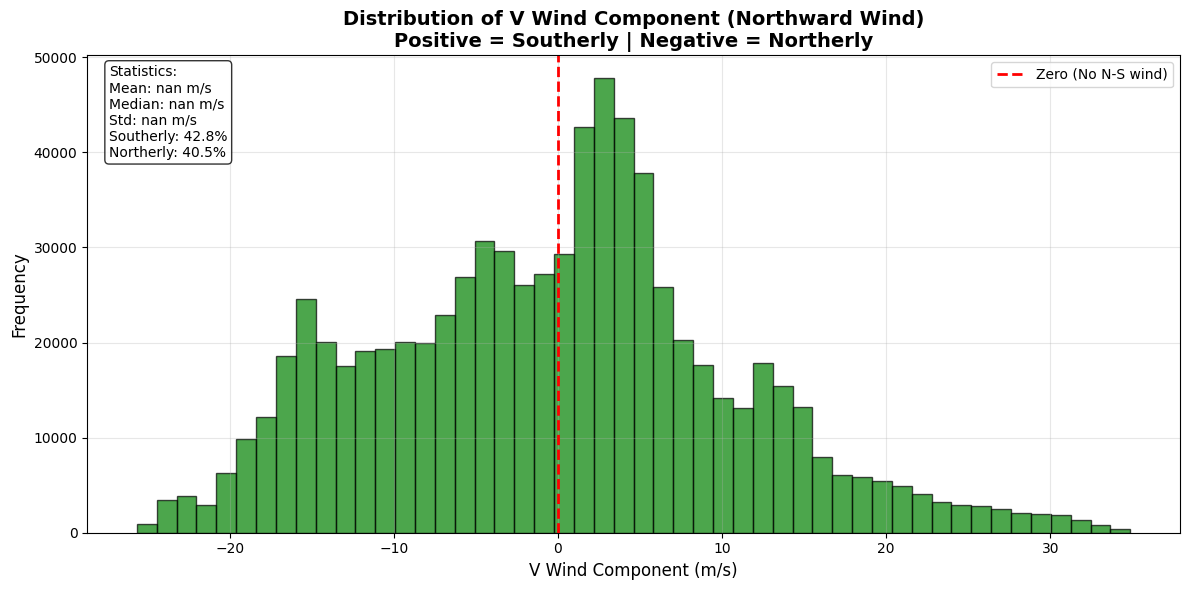

✅ V wind component histogram created!

Key Insights:
- Average V component: nan m/s
- Balanced north-south wind components


In [11]:
# Create histogram of V wind component
plt.figure(figsize=(12, 6))

v_values = ds['v'].values.flatten()

plt.hist(v_values, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero (No N-S wind)')
plt.xlabel('V Wind Component (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of V Wind Component (Northward Wind)\nPositive = Southerly | Negative = Northerly', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Add statistics
stats_text = f'''Statistics:
Mean: {np.mean(v_values):.2f} m/s
Median: {np.median(v_values):.2f} m/s
Std: {np.std(v_values):.2f} m/s
Southerly: {np.sum(v_values > 0)/len(v_values)*100:.1f}%
Northerly: {np.sum(v_values < 0)/len(v_values)*100:.1f}%'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ V wind component histogram created!")
print(f"\nKey Insights:")
print(f"- Average V component: {np.mean(v_values):.2f} m/s")
if np.mean(v_values) > 0:
    print(f"- Predominantly southerly winds (positive V)")
elif np.mean(v_values) < 0:
    print(f"- Predominantly northerly winds (negative V)")
else:
    print(f"- Balanced north-south wind components")

## 11. Spatial Visualization - Plotting Coordinates on Map

Let's start simple: plot all the latitude and longitude coordinate pairs on a map to visualize the spatial coverage of your GRIB2 data.

In [12]:
# Set up the plotting environment
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Get coordinate information
lats = ds.latitude.values
lons = ds.longitude.values

print(f"Latitude range: {lats.min():.2f}° to {lats.max():.2f}°")
print(f"Longitude range: {lons.min():.2f}° to {lons.max():.2f}°")
print(f"Grid resolution: {len(lats)} x {len(lons)} points")
print(f"Total grid points: {len(lats) * len(lons)}")

# Create meshgrid of all coordinate points
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

print(f"Meshgrid shape: {lon_mesh.shape}")
print("Ready to plot coordinates!")

Latitude range: 43.18° to 58.08°
Longitude range: -3.94° to 20.34°
Grid resolution: 746 x 1215 points
Total grid points: 906390
Meshgrid shape: (746, 1215)
Ready to plot coordinates!


### Simple Coordinate Plot

Let's plot all the latitude and longitude coordinate pairs as points on a map.

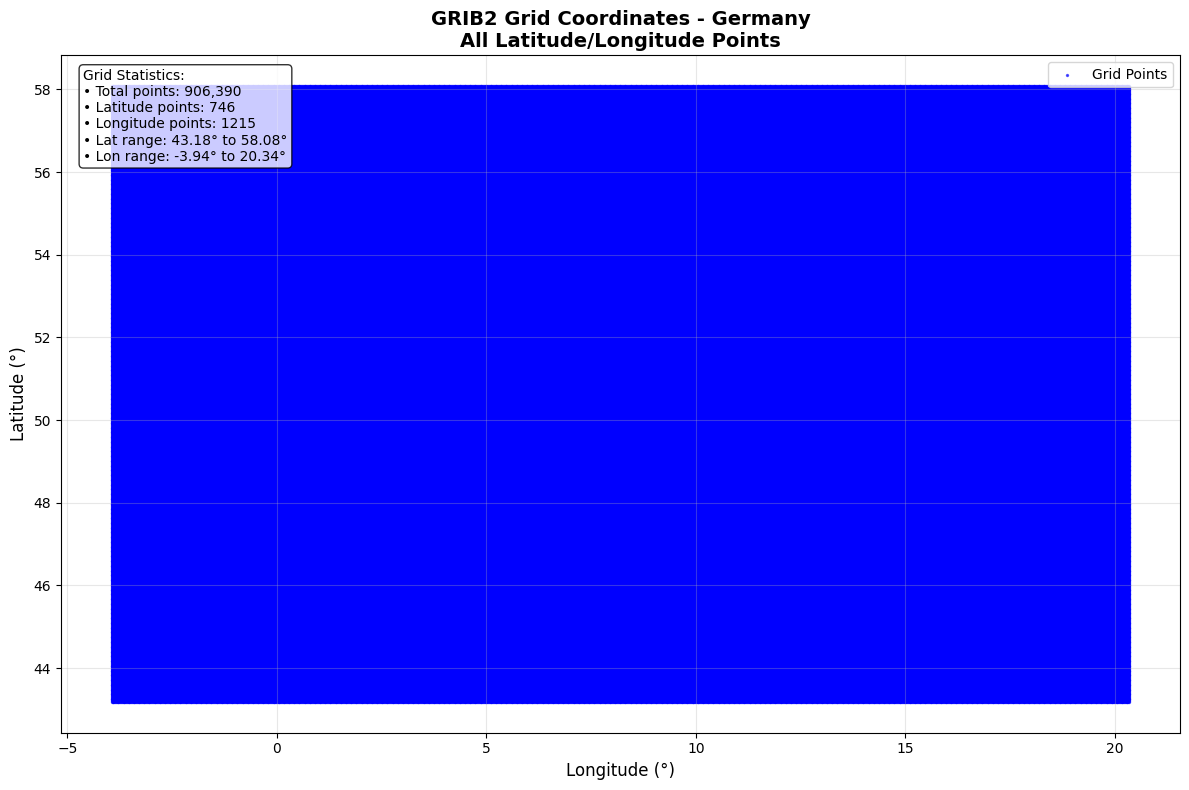

✅ Successfully plotted all coordinate points!
Each blue dot represents one latitude/longitude measurement location.
This shows the complete spatial coverage of your GRIB2 data.


In [13]:
# Simple scatter plot of all coordinate points
plt.figure(figsize=(12, 8))

plt.scatter(lon_mesh, lat_mesh, c='blue', s=2, alpha=0.6, label='Grid Points')

# Set labels and title
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.title('GRIB2 Grid Coordinates - Germany\nAll Latitude/Longitude Points', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Add some reference information
stats_text = f'''Grid Statistics:
• Total points: {len(lats) * len(lons):,}
• Latitude points: {len(lats)}
• Longitude points: {len(lons)}
• Lat range: {lats.min():.2f}° to {lats.max():.2f}°
• Lon range: {lons.min():.2f}° to {lons.max():.2f}°'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("✅ Successfully plotted all coordinate points!")
print(f"Each blue dot represents one latitude/longitude measurement location.")
print(f"This shows the complete spatial coverage of your GRIB2 data.")

## 12. Visualize V Wind Component on Map

Now let's visualize the actual V wind component values across the spatial domain.

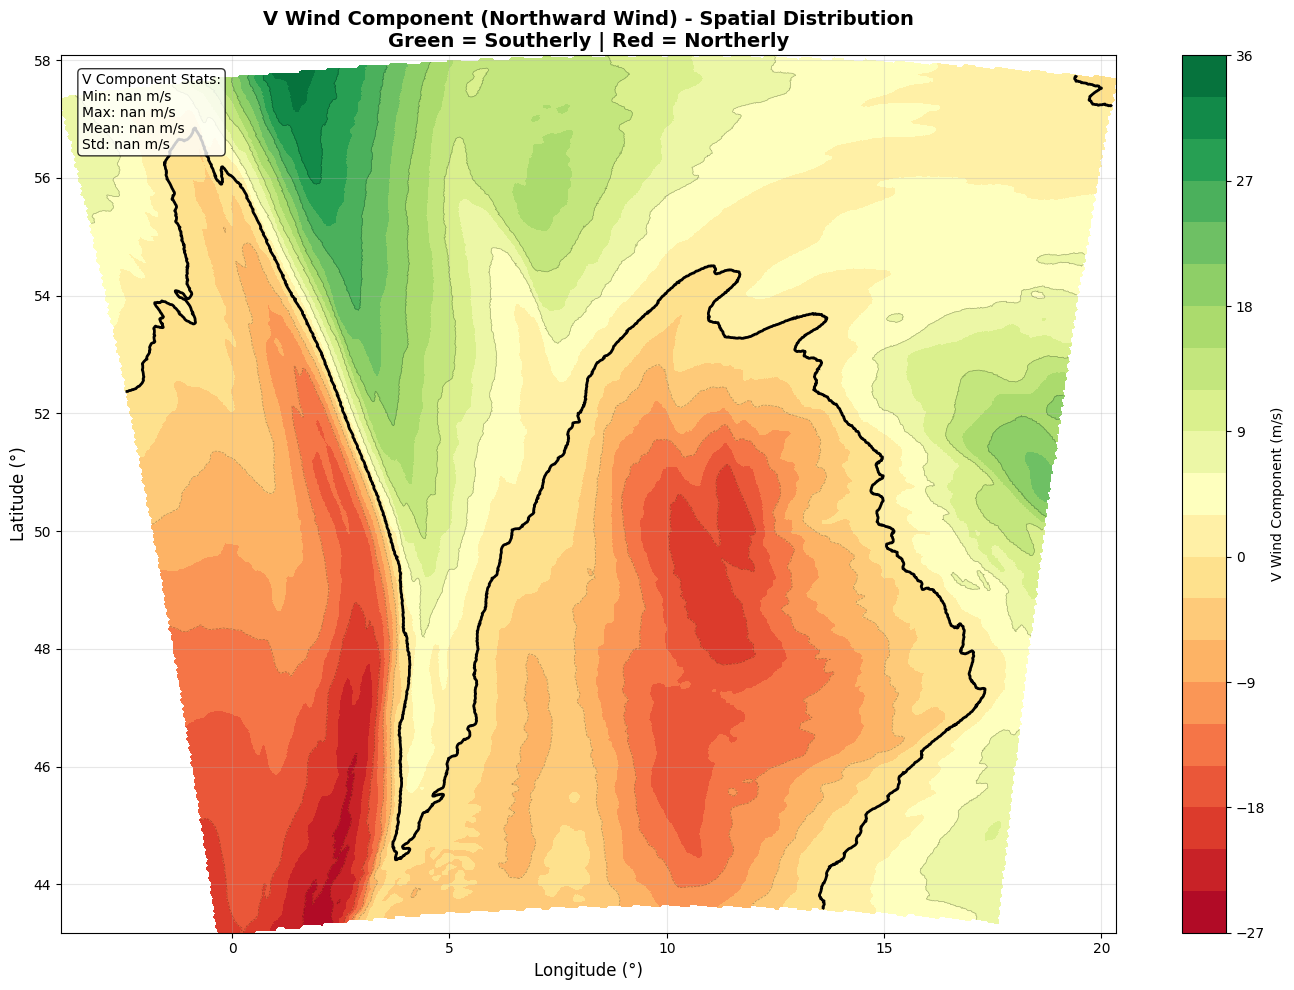

✅ V wind component spatial visualization created!


In [14]:
# Create a spatial plot of V wind component
plt.figure(figsize=(14, 10))

# Get V wind values
v_data = ds['v'].values

# Create contour plot
contour = plt.contourf(lon_mesh, lat_mesh, v_data, levels=20, cmap='RdYlGn')
plt.colorbar(contour, label='V Wind Component (m/s)')

# Add contour lines
plt.contour(lon_mesh, lat_mesh, v_data, levels=10, colors='black', alpha=0.3, linewidths=0.5)

# Add zero line (where V=0)
plt.contour(lon_mesh, lat_mesh, v_data, levels=[0], colors='black', linewidths=2)

plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.title('V Wind Component (Northward Wind) - Spatial Distribution\nGreen = Southerly | Red = Northerly', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add statistics
stats_text = f'''V Component Stats:
Min: {np.min(v_data):.2f} m/s
Max: {np.max(v_data):.2f} m/s
Mean: {np.mean(v_data):.2f} m/s
Std: {np.std(v_data):.2f} m/s'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ V wind component spatial visualization created!")

## 13. Plot Coordinates on Geographical Map (Optional)

Now let's plot the coordinates on an actual geographical map with proper map features like coastlines, country borders, and geographical context.

✅ Cartopy is available - creating geographical map!


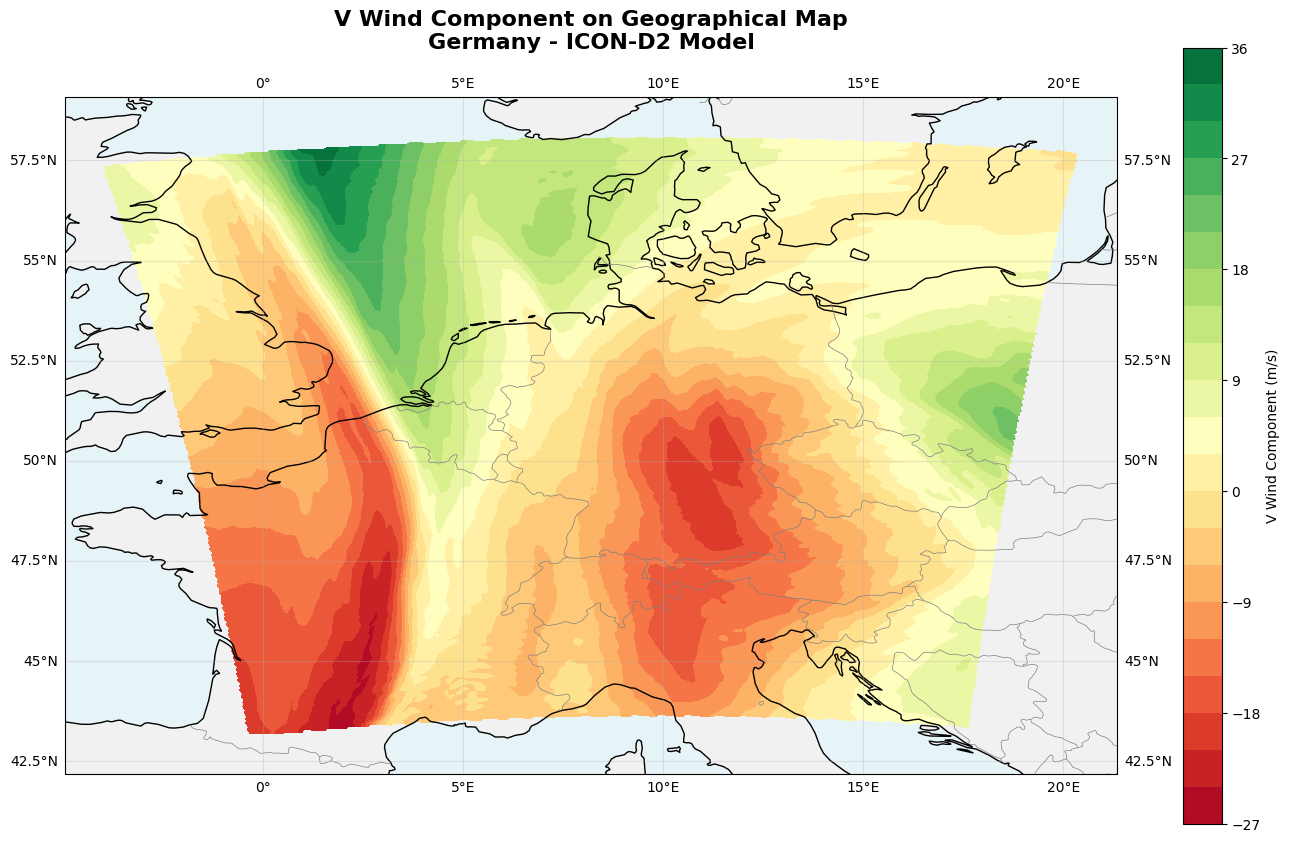

✅ Successfully created geographical map with Cartopy!


In [15]:
# Try to use Cartopy for proper geographical maps
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    print("✅ Cartopy is available - creating geographical map!")
    
    # Create figure with PlateCarree projection (appropriate for lat/lon data)
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    
    # Plot the V wind component
    v_plot = ax.contourf(lon_mesh, lat_mesh, v_data, levels=20, cmap='RdYlGn',
                         transform=ccrs.PlateCarree())
    plt.colorbar(v_plot, ax=ax, label='V Wind Component (m/s)', shrink=0.8)
    
    # Set map extent to focus on Germany and surroundings
    ax.set_extent([lons.min()-1, lons.max()+1, lats.min()-1, lats.max()+1],
                  crs=ccrs.PlateCarree())
    
    # Add gridlines
    ax.gridlines(draw_labels=True, alpha=0.3)
    
    # Add title and labels
    ax.set_title('V Wind Component on Geographical Map\nGermany - ICON-D2 Model',
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Successfully created geographical map with Cartopy!")
    
except ImportError:
    print("⚠️  Cartopy not available. To install:")
    print("pip install cartopy")
    print("Or if using conda:")
    print("conda install -c conda-forge cartopy")

## 14. Summary and Key Findings

### V Wind Component Overview:
- **What it represents**: Northward component of horizontal wind
- **Units**: meters per second (m/s)
- **Interpretation**:
  - Positive values = Southerly winds (wind from south)
  - Negative values = Northerly winds (wind from north)
  - Zero = No north-south component

### Applications:
1. **Wind Energy**: V component is crucial for wind power generation analysis
2. **Weather Forecasting**: Combined with U component for complete wind field
3. **Aviation**: Critical for flight planning and safety
4. **Atmospheric Transport**: Understanding pollutant or moisture advection

### Combined Analysis:
When analyzing both U and V components together, you can:
- Calculate total wind speed: Speed = √(U² + V²)
- Determine wind direction: Direction = arctan2(U, V)
- Identify wind patterns and circulation systems
- Assess wind power potential more accurately